In [1]:
from octis.dataset.dataset import Dataset
import hdbscan
import umap
import sys
sys.path.append('C:\\Users\\Martin\\Documents\\GitHub\\master\\evaluation')
import trainer
import helper
import pandas as pd

In [2]:
from sentence_transformers import SentenceTransformer

In [3]:
import multimodal
import c_tf_idf
import multimodalModel

In [4]:
import seaborn as sns

In [5]:
dataset_folder = './multimodal_custom_octis_dataset/'

In [6]:
mm_dataset = Dataset()
mm_dataset.load_custom_dataset_from_folder(dataset_folder)

In [7]:
embedding_model = SentenceTransformer("clip-ViT-B-32")

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [8]:
alt_embedding_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [9]:

path_to_data = './multimodal_data.tsv'

try:
    texts, images = multimodal.get_image_and_text_from_file(path_to_data)
except FileNotFoundError:
    base_path = '..\\data\\processed'
    ends = ['processed_part-00000-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00001-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00002-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00003-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,'processed_part-00004-48a6f07e-bb86-4735-aac7-883349f41a28-c000.tsv'
            ,]
    paths = [f'{base_path}\\{end}' for end in ends]
    df = helper.load_all_data(paths)
    df.to_csv(path_to_data, index=False, sep='\t')
    texts, images = helper.get_image_and_text_from_df(df)


In [10]:
text_embed = multimodal.get_embeddings_from_text(texts, embedding_model)
image_embed = multimodal.get_embeddings_from_images(images, embedding_model)


 37%|███▋      | 34/91 [00:29<00:44,  1.27it/s]c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 91/91 [01:16<00:00,  1.19it/s]


In [11]:
alt_text_embedding = multimodal.get_embeddings_from_text(texts, alt_embedding_model)

100%|██████████| 91/91 [00:17<00:00,  5.34it/s]


In [12]:
metricsloader = trainer.MetricsLoader(dataset_folder)

# Experiment 1

In [24]:
params = {'path_to_data':path_to_data,
'embedding_model':SentenceTransformer("clip-ViT-B-32"),

'precomputed_text_embeds':text_embed,
'precomputed_image_embeds':image_embed
}
umap_embeddings_1 = []
clusterers_1 = []
min_cluster_sizes = [100, 200, 400]
for min_cluster_size in min_cluster_sizes:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    params['clusterer']=clusterer

    model = multimodalModel.MultimodalModel(**params)
    model.fit()
    umap_embeddings_1.append(model.umap_embedding)
    clusterers_1.append(model.clusterer)

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


<AxesSubplot:>

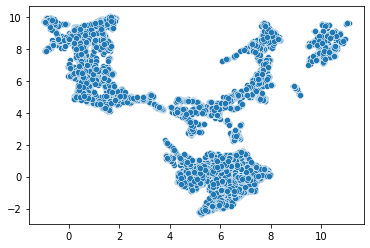

In [26]:
emb = umap_embeddings_1[0]
sns.scatterplot(x=emb[:,0], y=emb[:,1])

<AxesSubplot:>

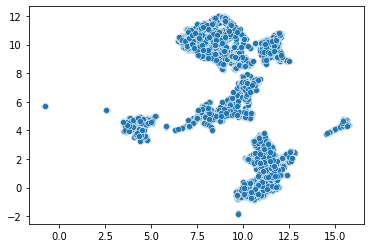

In [27]:
emb = umap_embeddings_1[1]
sns.scatterplot(x=emb[:,0], y=emb[:,1])

<AxesSubplot:>

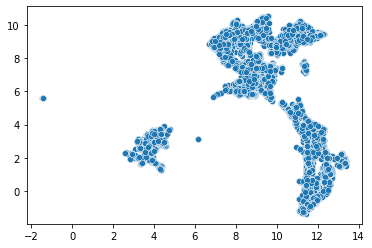

In [28]:
emb = umap_embeddings_1[2]
sns.scatterplot(x=emb[:,0], y=emb[:,1])

<AxesSubplot:ylabel='$\\lambda$ value'>

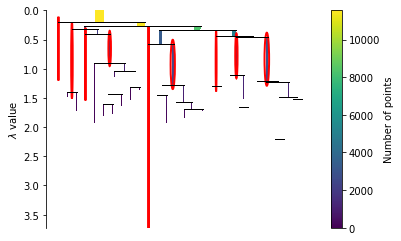

In [29]:
clusterer = clusterers_1[0]
clusterer.condensed_tree_.plot(select_clusters=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

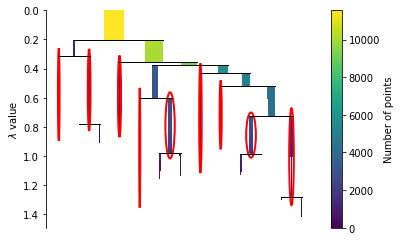

In [30]:
clusterer = clusterers_1[1]
clusterer.condensed_tree_.plot(select_clusters=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

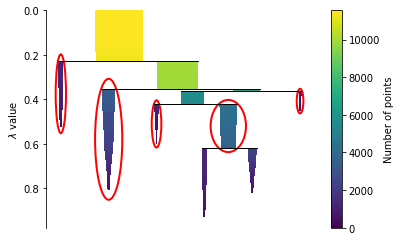

In [31]:
clusterer = clusterers_1[2]
clusterer.condensed_tree_.plot(select_clusters=True)

# Experiment 2

In [32]:
params = {'path_to_data':path_to_data,
'embedding_model':SentenceTransformer("clip-ViT-B-32"),

'precomputed_text_embeds':text_embed,
'precomputed_image_embeds':image_embed
}

min_cluster_size = 200
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
params['clusterer']=clusterer
umap_embeddings_2 = []
single_modalities = [text_embed, image_embed]
for modality in single_modalities:
   
    params['combined_embed']=modality
    model = multimodalModel.MultimodalModel(**params)
    model.fit()
    umap_embeddings_2.append(model.umap_embedding)

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


<AxesSubplot:>

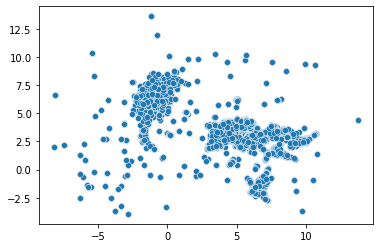

In [33]:
emb = umap_embeddings_2[0]
sns.scatterplot(x=emb[:,0], y=emb[:,1])

<AxesSubplot:>

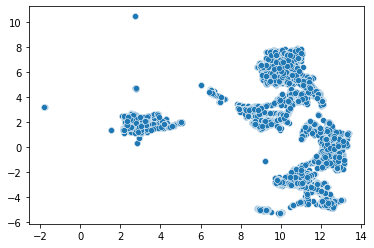

In [34]:
emb = umap_embeddings_2[1]
sns.scatterplot(x=emb[:,0], y=emb[:,1])

# Experiment 3

In [35]:
params = {'path_to_data':path_to_data,
'embedding_model':SentenceTransformer("clip-ViT-B-32"),

'precomputed_text_embeds':alt_text_embedding,
'precomputed_image_embeds':image_embed
}

min_cluster_size = 200
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
params['clusterer']=clusterer
umap_embeddings_3 = []

params['combined_embed']=modality
model = multimodalModel.MultimodalModel(**params)
model.fit()
umap_embeddings_3.append(model.umap_embedding)

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


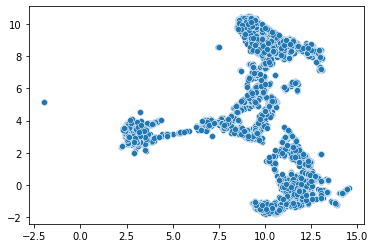

In [36]:
for emb in umap_embeddings_3:
    sns.scatterplot(x=emb[:,0], y=emb[:,1])

# Experiment 3.2

In [37]:
params = {'path_to_data':path_to_data,
'embedding_model':SentenceTransformer("clip-ViT-B-32"),

'precomputed_text_embeds':alt_text_embedding,
'precomputed_image_embeds':image_embed
}

min_cluster_size = 200
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
params['clusterer']=clusterer
umap_embeddings_3_2 = []
single_modalities = [text_embed, image_embed]

params['combined_embed']=alt_text_embedding
model = multimodalModel.MultimodalModel(**params)
model.fit()
umap_embeddings_3_2.append(model.umap_embedding)

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


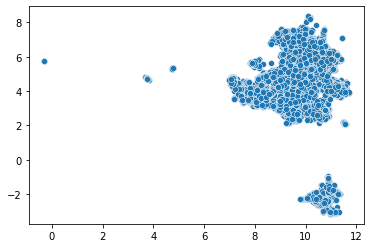

In [38]:
for emb in umap_embeddings_3_2:
    sns.scatterplot(x=emb[:,0], y=emb[:,1])